In [1]:
import os
import numpy as np
import networkx as nx
import dataquality as dq
import matplotlib.pyplot as plt
import seaborn as sns
import networkx.algorithms.community as nx_comm
from collections import defaultdict, deque

from networkx.algorithms.community import modularity
from networkx.utils import py_random_state

os.environ["GALILEO_CONSOLE_URL"] = "https://console.dev.rungalileo.io"
os.environ["GALILEO_USERNAME"] = "galileo@rungalileo.io"
os.environ["GALILEO_PASSWORD"] = "A11a1una!"

# os.environ["GALILEO_CONSOLE_URL"] = "https://console.preprod.rungalileo.io"
# os.environ["GALILEO_USERNAME"] = "galileo@rungalileo.io"
# os.environ["GALILEO_PASSWORD"] = "I5xV1n7$NBYFmmzH$S8LgkJ"

# os.environ["GALILEO_CONSOLE_URL"] = "https://console.sandbox.rungalileo.io"
# os.environ["GALILEO_USERNAME"] = "galileo@rungalileo.io"
# os.environ["GALILEO_PASSWORD"] = "Th3secret_"

dq.login()

%matplotlib inline

📡 https://console.dev.rungalileo.io
🔭 Logging you into Galileo

👀 Found auth method email set via env, skipping prompt.
🚀 You're logged in to Galileo as galileo@rungalileo.io!


In [513]:
dq.configure()

📡 https://console.preprod.rungalileo.io
🔭 Logging you into Galileo

👀 Found auth method email set via env, skipping prompt.
🚀 You're logged in to Galileo as galileo@rungalileo.io!


In [168]:
project_name = "original" #"original" #"inference_bug-bash"
run_name = "square" #"banking_intent" #"newsgroups"
split = "train"

df_square = dq.metrics.get_dataframe(project_name, run_name, split=split, include_probs=True)
labels_square = dq.metrics.get_labels_for_run(project_name, run_name)

In [2]:
project_name = "original" #"inference_bug-bash"
run_name = "banking_intent" #"newsgroups"
split = "train"

df_bank = dq.metrics.get_dataframe(project_name, run_name, split=split, include_probs=True)
labels_bank = dq.metrics.get_labels_for_run(project_name, run_name)

In [3]:
project_name = "inference_bug-bash"
run_name = "newsgroups"
split = "train"

df_news = dq.metrics.get_dataframe(project_name, run_name, split=split, include_probs=True)
labels_news = dq.metrics.get_labels_for_run(project_name, run_name)

In [422]:
project_name = "Chatbot_Intent_Classification"
run_name = "transformer_v1_5epochs_32batchsize"
split = "train"

df_conv = dq.metrics.get_dataframe(project_name, run_name, split=split, include_probs=True)
labels_conv = dq.metrics.get_labels_for_run(project_name, run_name)

In [27]:
project_name = "auto_safegraph"
run_name = "run_1"
split = "train"

df_safeg = dq.metrics.get_dataframe(project_name, run_name, split=split, include_probs=True)
labels_safeg = dq.metrics.get_labels_for_run(project_name, run_name)

In [514]:
project_name = "demo_hour" #"original" #"inference_bug-bash"
run_name = "distilbert_cbo_5" #"banking_intent" #"newsgroups"
split = "train"

df_conv = dq.metrics.get_dataframe(project_name, run_name, split=split, include_probs=True)
labels_conv = dq.metrics.get_labels_for_run(project_name, run_name)

In [28]:
df = df_safeg
labels = labels_safeg

In [29]:
str2int = {labels[i]: i for i in range(len(labels))}
str2int

{'Accounting, Tax Preparation, Bookkeeping, and Payroll Services': 0,
 'Advertising, Public Relations, and Related Services': 1,
 'All Other Amusement and Recreation Industries': 2,
 'All Other Consumer Goods Rental': 3,
 'All Other General Merchandise Stores': 4,
 'All Other Health and Personal Care Stores': 5,
 'All Other Miscellaneous Schools and Instruction': 6,
 'All Other Miscellaneous Store Retailers (except Tobacco Stores)': 7,
 'All Other Nondepository Credit Intermediation': 8,
 'All Other Outpatient Care Centers': 9,
 'All Other Personal Services': 10,
 'All Other Specialty Food Stores': 11,
 'All Other Transit and Ground Passenger Transportation': 12,
 'Ambulance Services': 13,
 'Amusement Arcades': 14,
 'Amusement and Theme Parks': 15,
 'Appliance Repair and Maintenance': 16,
 'Architectural, Engineering, and Related Services': 17,
 'Art Dealers': 18,
 'Automobile Driving Schools': 19,
 'Automotive Parts and Accessories Stores': 20,
 'Automotive Repair and Maintenance': 21

In [30]:
probs = df['prob'].values
gt_labels = [str(s) for s in df['label'].values]
G = generate_graph(probs, gt_labels, str2int)

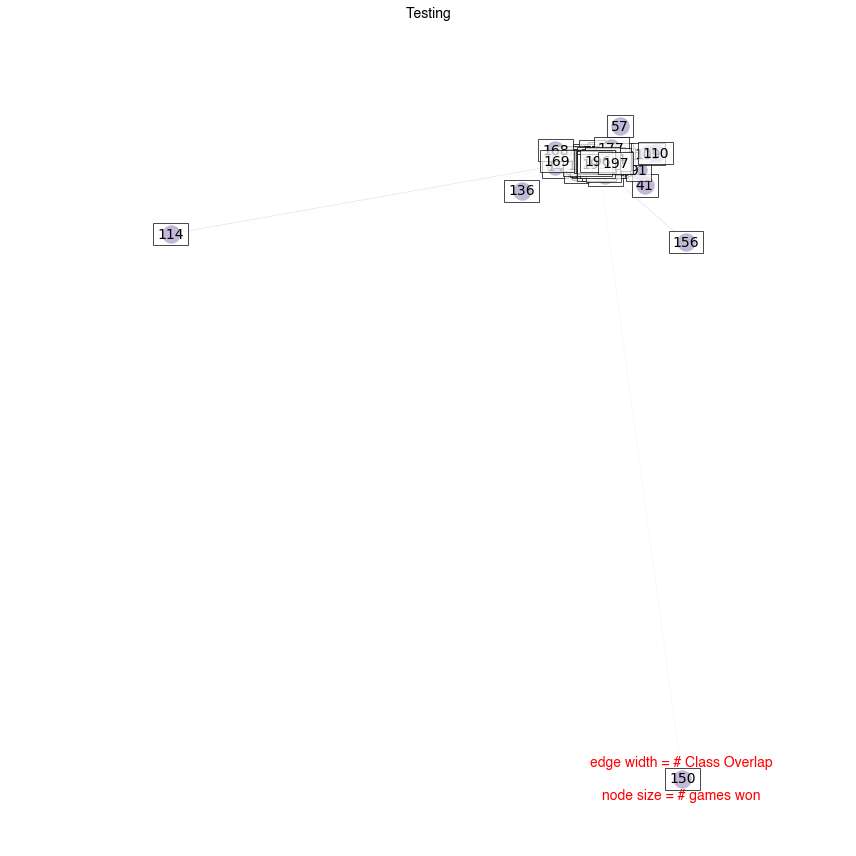

In [31]:
plot_graph(G, include_self_loops=False)

In [32]:
nx_comm.louvain_communities(G, seed=123, weight="weight")

[{0},
 {1, 104, 117, 148},
 {103},
 {5},
 {7, 48},
 {11, 26, 38},
 {13},
 {17},
 {19},
 {20, 21, 74, 181},
 {182},
 {23, 105},
 {24, 81, 167},
 {16, 27},
 {29, 94},
 {8, 40, 47, 108, 126, 131},
 {42},
 {43},
 {44},
 {4, 49},
 {22, 30, 31, 51, 52},
 {39, 55, 56, 57, 196},
 {33, 58, 158},
 {59},
 {61},
 {62, 65, 146, 157},
 {50, 63, 107, 121},
 {93},
 {67, 177},
 {3, 10, 68},
 {72, 98},
 {2, 14, 15, 25, 78, 151},
 {79, 132},
 {46, 80, 113, 152},
 {84},
 {85},
 {86, 102, 118, 137, 191},
 {87},
 {76, 91},
 {92},
 {95, 136, 140, 156, 185},
 {96},
 {97},
 {35, 100, 188},
 {89},
 {37, 90},
 {32, 66, 71, 106, 178},
 {53, 109, 141, 149},
 {110, 145, 172, 190},
 {111},
 {120},
 {69},
 {123},
 {124},
 {125},
 {127},
 {130, 159},
 {54, 133},
 {18, 34, 64, 77, 114, 134},
 {194},
 {75, 129, 138},
 {142},
 {143},
 {144},
 {45, 147},
 {153},
 {28, 73, 82, 135, 160, 173},
 {70, 162},
 {88, 163, 184},
 {164, 192},
 {60, 166},
 {168},
 {161, 170},
 {9, 41, 83, 119, 122, 128, 150, 165, 171, 175},
 {112, 1

In [33]:
dendogram = create_dendogram(G)

[{104, 1, 148, 117}, {5}, {145, 172, 110}, {26, 11, 38}, {13}, {74, 20, 21, 181}, {182}, {24, 81, 190}, {16, 27}, {160, 82, 135, 73, 28, 173}, {188, 35, 100}, {180, 36, 101, 6}, {196, 39, 55, 56, 57}, {42}, {43}, {44}, {147, 45}, {48, 7}, {49, 4}, {51, 52, 22, 30, 31}, {33, 58, 158}, {59}, {142}, {61}, {64, 114, 18, 34}, {93}, {177, 67}, {10, 3, 68}, {69}, {162, 70, 167}, {91, 76}, {2, 14, 151, 25, 78, 15}, {17}, {83, 165, 150, 119, 41, 171}, {84}, {85}, {87}, {89}, {90, 37}, {92}, {29, 94}, {136, 95}, {96}, {97}, {72, 98}, {139, 99, 12, 179}, {120}, {86, 137, 102, 191}, {103}, {105, 23}, {32, 178, 66, 71, 106}, {53, 109, 149, 141}, {111}, {80, 113, 152, 46}, {186, 116}, {118}, {125}, {121, 50, 107, 63}, {123}, {124}, {0}, {127}, {130, 159}, {131, 8, 40, 108, 126, 47}, {132, 79}, {133, 54}, {77, 134}, {129, 138, 75}, {143}, {144}, {65, 146, 157, 62}, {153}, {193, 154, 174, 183}, {112, 169, 155, 176}, {161, 170}, {184, 88, 163}, {60, 166}, {168}, {128, 9, 122, 175}, {19}, {185, 156, 140

In [34]:
draw_dendogram(dendogram, labels, "newsgroups")

Classes
├── Environment, Conservation and Wildlife Organizations/
Accounting, Tax Preparation, Bookkeeping, and Payroll Services/
Correctional Institutions/
Rail Transportation/
Continuing Care Retirement Communities and Assisted Living Facilities for the Elderly/
Used Household and Office Goods Moving/
Limousine Service/
Services to Buildings and Dwellings/
Lessors of Miniwarehouses and Self-Storage Units/
Passenger Car Rental/
Sporting Goods Stores/
Specialized Freight (except Used Goods) Trucking, Long-Distance/
Motorcycle, ATV, and All Other Motor Vehicle Dealers/
Recreational Vehicle Dealers/
Offices of Physical, Occupational and Speech Therapists, and Audiologists/
Credit Unions/
Mortgage and Nonmortgage Loan Brokers/
Architectural, Engineering, and Related Services/
Offices of Notaries/
Home Health Care Services/
Offices of Lawyers/
Pharmacies and Drug Stores/
Nursing and Residential Care Facilities/
Couriers and Express Delivery Services/
Parking Lots and Garages/
Transit and G

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.44183 to fit


# RUN EVERYTHING BELOW HERE FIRST!

In [8]:
import networkx as nx
import networkx.algorithms.community as nx_comm

def generate_graph(probs, labels, str2int):
    G = nx.Graph()
    G.add_nodes_from(np.arange(len(str2int)))
    for prob, label in zip(probs, gt_labels):
        int_label = str2int[label]
        sorted_probs = np.argsort(prob)
        # Look at top 2 pred classes!
        # Honestly we could try all the probs!!
        for i in range(1, 3):
            pred_label = sorted_probs[-i]
            # Try allowing self loops
            if pred_label != -1: #int_label:
                new_edge_weight = prob[pred_label]
                # Check if an edge exists
                if pred_label in G[int_label]:
                    new_edge_weight += G[int_label][pred_label]['weight']

                G.add_edge(int_label, pred_label, weight=new_edge_weight)
    return G

In [8]:
import dataquality as dq
dq.configure()

Welcome to Galileo v0.8.4!
To skip this prompt in the future, set the following environment variable: GALILEO_CONSOLE_URL
🔭 Enter the url of your Galileo console
console.dev.rungalileo.io
📡 https://console.dev.rungalileo.io
🔭 Logging you into Galileo

Go to https://console.dev.rungalileo.io/get-token to generate a new API Key
🔐 Enter your API Key:········
🚀 You're logged in to Galileo as galileo@rungalileo.io!


In [11]:
probs = dq.metrics.get_probabilities("foo","bar","train").prob.to_numpy()
labels = dq.metrics.get_labels_for_run("foo","bar","train")

In [16]:
G = generate_graph(probs, labels)

In [15]:
import networkx as nx
import networkx.algorithms.community as nx_comm

def generate_graph(probs, labels, G = None):
    str2int = {lbl: i for i, lbl in enumerate(labels)}
    if not G:
        G = nx.Graph()
        G.add_nodes_from(np.arange(len(labels)))
    for prob, label in zip(probs, labels):
        int_label = str2int[label]
        # Argsort descending
        sorted_probs = np.argsort(l)[::-1]
        # Look at top 2 pred classes!
        # Honestly we could try all the probs!!
        for i in range(2):
            pred_label = sorted_probs[i]
            new_edge_weight = prob[pred_label]
            # Check if an edge exists
            if pred_label in G[int_label]:
                new_edge_weight += G[int_label][pred_label]['weight']

            G.add_edge(int_label, pred_label, weight=new_edge_weight)
    return G

In [18]:
G.__dict__

{'graph': {},
 '_node': {0: {},
  1: {},
  2: {},
  3: {},
  4: {},
  5: {},
  6: {},
  7: {},
  8: {},
  9: {},
  10: {},
  11: {},
  12: {},
  13: {},
  14: {},
  15: {},
  16: {},
  17: {},
  18: {},
  19: {}},
 '_adj': {0: {1: {'weight': 0.08464070601966744},
   0: {'weight': 0.0909055560622585},
   2: {'weight': 0.1000597377199547},
   3: {'weight': 0.0048089395622609235},
   4: {'weight': 0.07089521386284363},
   5: {'weight': 0.07817729328990594},
   6: {'weight': 0.0566270078435712},
   7: {'weight': 0.07568554761026822},
   8: {'weight': 0.03999233308859433},
   9: {'weight': 0.058935483606548704},
   10: {'weight': 0.002682598295535743},
   11: {'weight': 0.09345640382484902},
   12: {'weight': 0.030315534842421894},
   13: {'weight': 0.08140842454060435},
   14: {'weight': 0.07090188466157156},
   15: {'weight': 0.09560140399438972},
   16: {'weight': 0.07308983876633673},
   17: {'weight': 0.039451397227768775},
   18: {'weight': 0.03951439584924189},
   19: {'weight': 0.06

In [28]:
communities = nx_comm.louvain_communities(G, seed=123, weight="weight")

In [30]:
communities

[{0, 2, 4, 7, 8, 9, 11, 12, 13, 15, 16, 19}, {1, 3, 5, 6, 10, 14, 17, 18}]

In [32]:
dq.metrics.get_probabilities("testing_remote", "MIT_Movies_Drift_1_BIO", "train")

#,id,sample_id,split,is_pred,span_start,span_end,pred,conf_prob,epoch,loss_prob,loss_prob_label,is_gold,gold,galileo_error_type
0,0,3035,training,True,2,4,GENRE,"'array([1.47152757e-02, 7.32521003e-04, 1.474897...",4,"'array([1.47152757e-02, 7.32521003e-04, 1.474897...",8,True,GENRE,None
1,1,3035,training,False,8,11,,"'array([0.30212766, 0.00456743, 0.0119949 , 0.00...",4,"'array([0.45423421, 0.00398001, 0.03162137, 0.00...",16,True,REVIEW,span_shift
2,2,3035,training,True,8,9,REVIEW,"'array([0.18926059, 0.01069207, 0.00799521, 0.00...",4,"'array([0.18926059, 0.01069207, 0.00799521, 0.00...",15,False,,None
3,3,658,training,True,1,3,ACTOR,"'array([2.25212402e-03, 9.91430998e-01, 1.737512...",4,"'array([2.25212402e-03, 9.91430998e-01, 1.737512...",1,True,ACTOR,None
4,4,658,training,True,6,7,RATING,"'array([1.48276752e-03, 4.69179300e-04, 3.750501...",4,"'array([1.48276752e-03, 4.69179300e-04, 3.750501...",19,True,RATING,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"10,645",10645,578,training,True,7,9,PLOT,"'array([1.35411778e-02, 2.83373432e-04, 4.325183...",4,"'array([1.35411778e-02, 2.83373432e-04, 4.325183...",14,True,PLOT,None
"10,646",10646,578,training,True,12,14,DIRECTOR,"'array([3.25244199e-03, 1.15143862e-02, 5.641538...",4,"'array([3.25244199e-03, 1.15143862e-02, 5.641538...",9,True,DIRECTOR,None
"10,647",10647,578,training,True,16,20,ACTOR,"'array([2.00313702e-03, 9.89919782e-01, 2.031714...",4,"'array([2.00313702e-03, 9.89919782e-01, 2.031714...",1,True,ACTOR,None
"10,648",10648,1688,training,True,1,2,RATING,"'array([4.18399752e-04, 2.46569398e-04, 1.893474...",4,"'array([4.18399752e-04, 2.46569398e-04, 1.893474...",19,True,RATING,None


In [10]:
def convert_to_string(dendogram, labels):
    str_dendogram = []
    for row in dendogram:
        new_row = []
        for community in row:
            new_community = set()
            for val in community:
                new_community.add(labels[val])
            
            new_row.append(new_community)
            
        str_dendogram.append(new_row)
    
    return str_dendogram

def create_dendogram(G, seed=123):
    dendogram = louvain_communities(G, seed=np.random.RandomState(seed), weight="weight")
    str_dendogram = convert_to_string(dendogram, labels)
    return str_dendogram

In [11]:
def plot_graph(G, include_self_loops=False):
    # edge width is weight of edge
    if include_self_loops:
        edgewidth = [G[u][v]['weight'] for u, v in G.edges()]
    else:
        edgewidth = [G[u][v]['weight'] if u != v else 0 for u, v in G.edges()]

    edgewidth = np.array(edgewidth)
    edgewidth = edgewidth / np.max(edgewidth) * 2
    
    # Generate layout for visualization
    pos = nx.kamada_kawai_layout(G)
    fig, ax = plt.subplots(figsize=(12, 12))
    # Visualize graph components
    nx.draw_networkx_edges(G, pos, alpha=0.3, width=edgewidth, edge_color="m")
    nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
    label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
    nx.draw_networkx_labels(G, pos, font_size=14, bbox=label_options)

    # Title/legend
    font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 14}
    ax.set_title("Testing", font)
    # Change font color for legend
    font["color"] = "r"

    ax.text(
        0.80,
        0.10,
        "edge width = # Class Overlap",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "node size = # games won",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readibility
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()


In [12]:
def draw_dendogram(dendogram, labels, title):
    tree = dendogram[:-1] # Exclude final cluster
    tree = sorted(tree, key=lambda layer: len(layer))
    # Add the leaf nodes
    tree.append([{label} for label in labels])

    from anytree import Node, RenderTree
    from collections import defaultdict


    def _find_parent(cur_node_class, created_nodes):
        for created_node_classes, created_node in created_nodes[idx-1]: 
            if cur_node_class in created_node_classes:
                return created_node

    C = Node("Classes")
    created_nodes = defaultdict(list)
    for idx,layer in enumerate(tree):
        for node in layer:
            node_name = "/\n".join(node)
            if idx == 0:
                parent = C
                n = Node(node_name, parent)

            else:
                # Grab any class from this group
                node_class = next(iter(node))
                # Check all nodes from the previous layer for the parent
                parent = _find_parent(node_class, created_nodes)
                n = Node(node_name, parent)
            created_nodes[idx].append((node, n))


    for pre, fill, node in RenderTree(C):
        print("%s%s" % (pre, node.name))



    from IPython.display import Image
    from anytree.exporter import UniqueDotExporter
    # graphviz needs to be installed for the next line!
    os.system(f"rm -rf {title}_taxonomy.png")
    #!rm -rf newsgroups_taxonomy.png
    UniqueDotExporter(C).to_picture(f"{title}_taxonomy.png")

    # show in jupyter
    Image(url=f"{title}_taxonomy.png")
    # to open outside of jupyter
    os.system(f"open {title}_taxonomy.png")
#     title = f"{title}_taxonomy.png"
#     !open f"{title}_taxonomy.png"

In [439]:
"""

Idea 1:
    - Each node is a class
    - We create an edge between two classes that are confused for each other within the top 2.
    - The edge weight is the probability / confidence in that class
    - Then look at this graph, not sure exactly what to see but let us try

Idea 2:
    - Each node is a class
    - Create edges like in 1
    - Then post process to create a sinlge bi-directional edge with weight being the sum of all the terms
    - Maybe normalize??
    
Implemenation:
Create a weighted Multi Graph MG
Loop through each prob vector
    - Argsort the probs
    - for the top two probs, create an edge between the GT label node and the predicted node with weight = pred prob.
    Do not create self edges for now
    
Implementation 2:
Create a Graph G
Loop through each prob vector
    - Argsort the probs
    - for the top two probs if the pred label is not the label of the sample itself:
        - see if there is an edge between the two:
            - if yes add the weight to the edge
            - else create an edge
"""

'\n\nIdea 1:\n    - Each node is a class\n    - We create an edge between two classes that are confused for each other within the top 2.\n    - The edge weight is the probability / confidence in that class\n    - Then look at this graph, not sure exactly what to see but let us try\n\nIdea 2:\n    - Each node is a class\n    - Create edges like in 1\n    - Then post process to create a sinlge bi-directional edge with weight being the sum of all the terms\n    - Maybe normalize??\n    \nImplemenation:\nCreate a weighted Multi Graph MG\nLoop through each prob vector\n    - Argsort the probs\n    - for the top two probs, create an edge between the GT label node and the predicted node with weight = pred prob.\n    Do not create self edges for now\n    \nImplementation 2:\nCreate a Graph G\nLoop through each prob vector\n    - Argsort the probs\n    - for the top two probs if the pred label is not the label of the sample itself:\n        - see if there is an edge between the two:\n          